<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-1-/blob/main/Stats_by_Python4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability density functions
>* Continuous Prob. Distr.
>* Cumulative Density Functions

(array([2.28454440e-05, 0.00000000e+00, 0.00000000e+00, 2.28454440e-05,
        1.14227220e-05, 0.00000000e+00, 1.14227220e-05, 4.56908880e-05,
        4.56908880e-05, 3.42681660e-05, 4.56908880e-05, 1.25649942e-04,
        1.37072664e-04, 1.94186274e-04, 2.62722606e-04, 2.17031718e-04,
        4.56908880e-04, 4.45486158e-04, 6.85363319e-04, 7.08208763e-04,
        9.70931369e-04, 1.32503575e-03, 1.73625374e-03, 1.93044002e-03,
        2.91279411e-03, 2.87852594e-03, 3.64384832e-03, 4.30636619e-03,
        5.42579295e-03, 6.55664242e-03, 7.08208763e-03, 9.34378659e-03,
        9.78927275e-03, 1.21537762e-02, 1.31018621e-02, 1.49523431e-02,
        1.70998148e-02, 2.02410634e-02, 2.05380541e-02, 2.38163754e-02,
        2.58381971e-02, 2.71632329e-02, 2.96762317e-02, 3.22463442e-02,
        3.31030483e-02, 3.27375212e-02, 3.58673471e-02, 3.66783603e-02,
        3.85516867e-02, 3.99566815e-02, 4.07676948e-02, 3.88829457e-02,
        3.87001821e-02, 3.87687184e-02, 3.72494964e-02, 3.624429

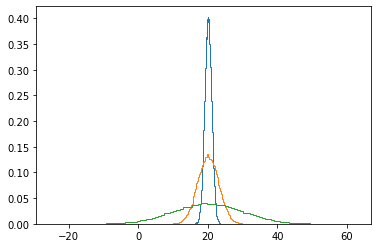

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms

plt.hist(samples_std1, bins=100, histtype='step', density=True)
plt.hist(samples_std3, bins=100, histtype='step', density=True)
plt.hist(samples_std10, bins=100, histtype='step', density=True)


In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

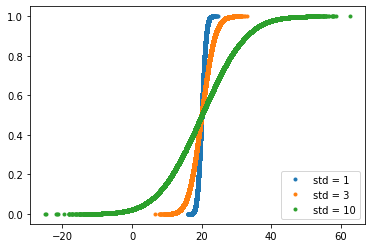

In [4]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3 , marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

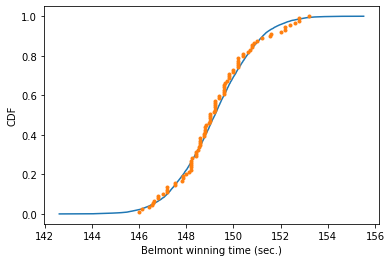

In [5]:
import pandas as pd

#upload a local file to the colab
#from google.colab import files
#uploaded = files.upload()

#Then you can copy it to the Google drive folder or

#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/belmont_no_outliers.csv'
belmont_no_outliers = np.loadtxt(fname=file_path, delimiter=',')

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size= 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [21]:
#!mv /content/belmont_no_outliers.csv /content/drive/MyDrive/datasets

#The chances of the occurrence of an event
>* With the known cdf, you may simulate that chance: i.e. you may ask a question like 'what is the chance of a horse running as fast or faster than a champion?'

In [9]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples<144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.00067


#Exponential distribution
>* The waiting time between arrivals of a Poisoon process (such as arrival of a bus) is exponentially distributed.
>* Nuclear accident is a rare event so its occurrence is Poisson distributed.  The waiting time for the next accident is exponentially distributed.

In [10]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Text(0, 0.5, 'Distribution')

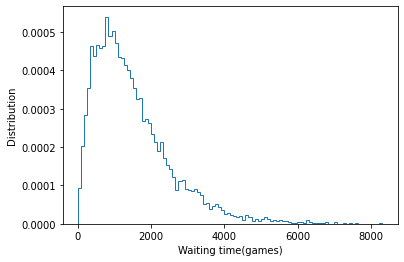

In [24]:
# Draw samples of waiting times: waiting_times (in games)
waiting_time_for_nohitter = 764
waiting_time_for_cyclehitter = 715
waiting_times = successive_poisson(waiting_time_for_nohitter, waiting_time_for_cyclehitter, size= 10000)


# Make the histogram
plt.hist(waiting_times, bins=100, density = True, histtype = 'step')


# Label axes
plt.xlabel('Waiting time(games)')
plt.ylabel('Distribution')

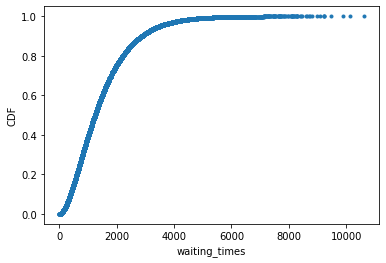

In [22]:
# Compute ECDF: x, y
x, y = ecdf(waiting_times)

# Plot the ECDF with labeled axes
# Generate plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes

plt.xlabel('waiting_times')
plt.ylabel('CDF')

# Show the plot
plt.show()
